In [117]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

files = [
    '/archive/shared/sim_center/shared/annie/diff_lev_scores/claude-sonnet-3.5-all.json',
    '/archive/shared/sim_center/shared/annie/diff_lev_scores/claude-sonnet-3.5-diar.json',
    '/archive/shared/sim_center/shared/annie/diff_lev_scores/gpt4-3chunk-og.json',
    '/archive/shared/sim_center/shared/annie/diff_lev_scores/gpt4-all.json',
    '/archive/shared/sim_center/shared/annie/diff_lev_scores/gpt4-diar.json',
    '/archive/shared/sim_center/shared/annie/diff_lev_scores/llama-70b-all.json',
    '/archive/shared/sim_center/shared/annie/diff_lev_scores/llama-70b-diar.json'
]

run_names = [
    'claude-sonnet-3.5-all',
    'claude-sonnet-3.5-diar',
    'gpt4-3chunk-og',
    'gpt4-all',
    'gpt4-diar',
    'llama-70b-all',
    'llama-70b-diar'
]

In [131]:
from pathlib import Path

path = '/archive/shared/sim_center/shared/annie/diff_lev_scores/'

# Specify the directory path
directory_path = Path(path)

# List all files in the directory
run_names = [f.name[:-5] for f in directory_path.iterdir() if f.is_file()]

# Print the list of file names
print(run_names)

['gpt4-3chunk-og', 'gpt4_3chunk_pass2', 'llama-70b-diar', 'claude-sonnet-3.5-all', 'gpt4-diar', 'gpt4-1chunk', 'claude-sonnet-3.5-diar', 'gpt4-all', 'gpt4o-all', 'GPT4 6-chunk', 'GPT4 9-chunk', 'llama-70b-all']


In [80]:
def df_from_file_1segment(path: str, run_name: str):

    with open(path + run_name + '.json', 'r') as file:
        data = json.load(file)
    
    ids = np.array(data[0])
    data = data[1]

    lev_pres = np.array([]),
    diff_pres = np.array([]),
    lev_acc = np.array([]),
    lev_acc_normed = np.array([]),
    diff_acc = np.array([]),
    diff_acc_normed = np.array([]),
    lev_baseline = np.array([]),
    diff_baseline = np.array([])

    for id in ids:
        lev_pres = np.append(lev_pres, data['preservation']['levenshtein'][id]['0'])
        diff_pres = np.append(diff_pres, data['preservation']['diff'][id]['0'])
        lev_acc = np.append(lev_acc, data['accuracy']['levenshtein'][id]['0'])
        lev_acc_normed = np.append(lev_acc_normed, data['accuracy']['levenshtein_baseline_normed'][id]['0'])
        diff_acc = np.append(diff_acc, data['accuracy']['diff'][id]['0'])
        diff_acc_normed = np.append(diff_acc_normed, data['accuracy']['diff_baseline_normed'][id]['0'])
        lev_baseline = np.append(lev_baseline, data['nolabel_baseline']['levenshtein'][id]['0'])
        diff_baseline = np.append(diff_baseline, data['nolabel_baseline']['diff'][id]['0'])
    
    columns = [ids,
        lev_pres,
        diff_pres,
        lev_acc,
        lev_acc_normed,
        diff_acc,
        diff_acc_normed,
        lev_baseline,
        diff_baseline,
        np.array([run_name]*len(ids))]

    col_names = [
        'ids',
        'lev_pres',
        'diff_pres',
        'lev_acc',
        'lev_acc_normed',
        'diff_acc',
        'diff_acc_normed',
        'lev_baseline',
        'diff_baseline',
        'run_name'
    ]
    
    df = pd.DataFrame(np.column_stack(columns), columns=col_names)

    return df




In [132]:
df = df_from_file_1segment(path, run_names[0])
for run_name in run_names[1:]:
    df = pd.concat((df, df_from_file_1segment(path, run_name)))

In [133]:
df['diff_pres']

0     0.8529611467370803
1     0.9626254217236998
2     0.9787777698914046
3      0.878479293957909
4     0.9283715301414417
             ...        
15    0.8969109195402298
16    0.9288886325624315
17    0.7567196928140428
18    0.6979126507682988
19    0.6365757982024927
Name: diff_pres, Length: 240, dtype: object

In [134]:
df['lev_pres'] = [float(i) for i in df['lev_pres']]

In [135]:
means = pd.DataFrame(df.groupby('run_name', as_index=False)['lev_pres'].mean())

In [136]:
means

,run_name,lev_pres
0,GPT4 6-chunk,0.954654
1,GPT4 9-chunk,0.953365
2,claude-sonnet-3.5-all,0.966245
3,claude-sonnet-3.5-diar,0.966804
4,gpt4-1chunk,0.954359
5,gpt4-3chunk-og,0.963511
6,gpt4-all,0.952398
7,gpt4-diar,0.962979
8,gpt4_3chunk_pass2,0.962310
9,gpt4o-all,0.968693


In [137]:
col_names = df.columns
for col_name in col_names[2:-1]:
    df[col_name] = [float(i) for i in df[col_name]]
    means[col_name] = df.groupby('run_name', as_index=False)[col_name].mean()[col_name]

In [138]:
means

,run_name,lev_pres,diff_pres,lev_acc,lev_acc_normed,diff_acc,diff_acc_normed,lev_baseline,diff_baseline
0,GPT4 6-chunk,0.954654,0.867894,0.938501,0.556913,0.710953,-1.073214,0.866914,0.809598
1,GPT4 9-chunk,0.953365,0.840471,0.933323,0.516305,0.727843,-0.578051,0.863692,0.788750
2,claude-sonnet-3.5-all,0.966245,0.889241,0.955706,0.649184,0.795107,-0.910889,0.873745,0.873222
3,claude-sonnet-3.5-diar,0.966804,0.920757,0.955217,0.637818,0.830338,-0.545150,0.874460,0.873622
4,gpt4-1chunk,0.954359,0.911922,0.936559,0.542904,0.761532,-1.260186,0.864272,0.862417
5,gpt4-3chunk-og,0.963511,0.882703,0.966229,0.713738,0.899376,-0.639238,0.881584,0.934667
6,gpt4-all,0.952398,0.930804,0.895583,0.292764,0.736816,-1.460780,0.857501,0.862689
7,gpt4-diar,0.962979,0.938774,0.918688,0.388930,0.725809,-1.413259,0.866923,0.873972
8,gpt4_3chunk_pass2,0.962310,0.880330,0.947083,0.581372,0.818898,-0.503450,0.872676,0.856092
9,gpt4o-all,0.968693,0.889633,0.948489,0.594550,0.791496,-0.513762,0.872894,0.814288


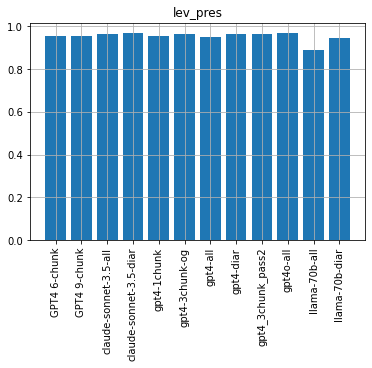

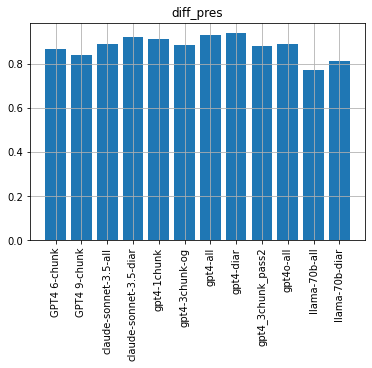

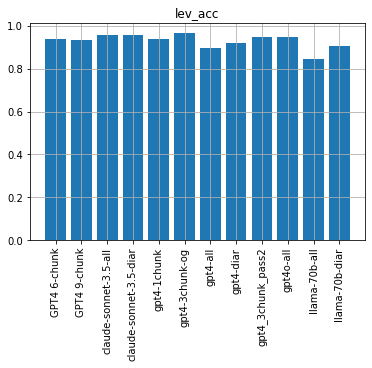

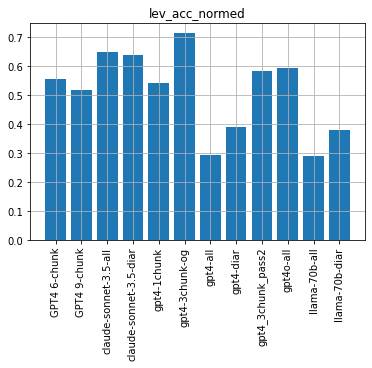

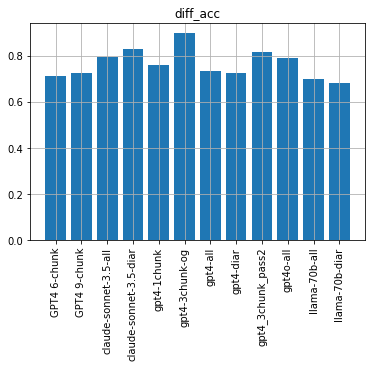

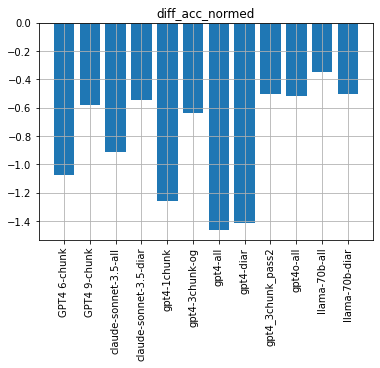

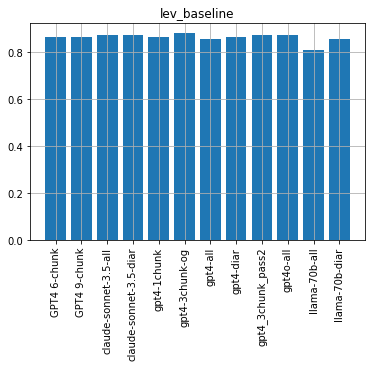

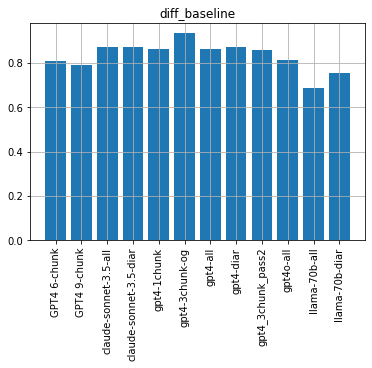

<Figure size 432x288 with 0 Axes>

In [139]:
for col_name in col_names[1:-1]:
    plt.bar(means['run_name'], means[col_name])
    plt.xticks(rotation='vertical')
    plt.title(col_name)
    plt.grid(True)
    plt.figure()
    plt.plot

plt.show()

In [158]:
plot_names = [
    'gpt4-1chunk',
    'gpt4-3chunk-og',
    'gpt4_3chunk_pass2',
    'GPT4 6-chunk',
    'GPT4 9-chunk',
    'gpt4-all',
    'gpt4-diar',
    'gpt4o-all',
    'llama-70b-all',
    'llama-70b-diar',
    'claude-sonnet-3.5-all',
    'claude-sonnet-3.5-diar'   
]

means.set_index('run_name', inplace=True)
means_reordered = means.loc[plot_names]
    
for col_name in col_names[1:-1]:
    plt.bar(plot_names, means_reordered[col_name])
    plt.xticks(rotation='vertical')
    plt.title(col_name)
    plt.grid(True)
    plt.figure()
    plt.plot

plt.show()

KeyError: "None of ['run_name'] are in the columns"

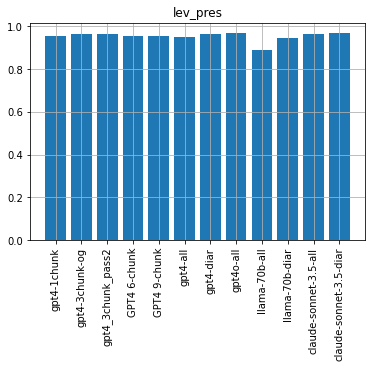

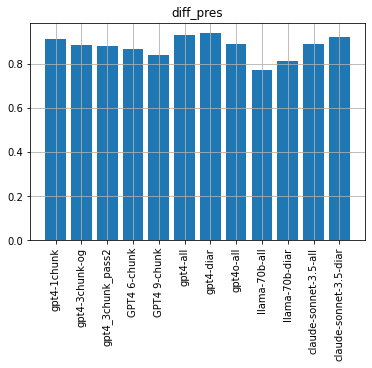

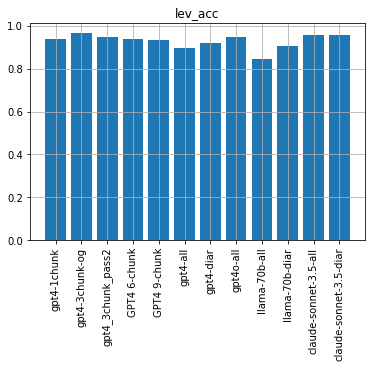

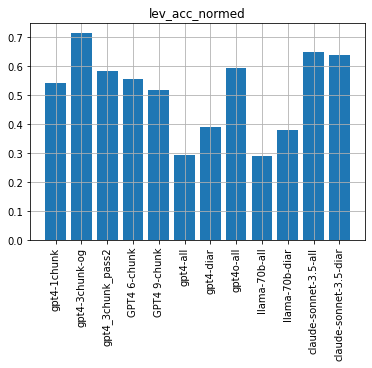

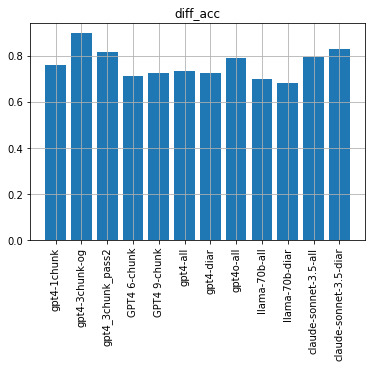

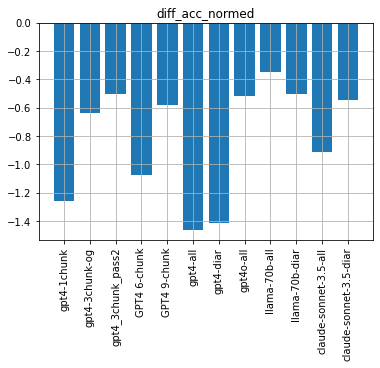

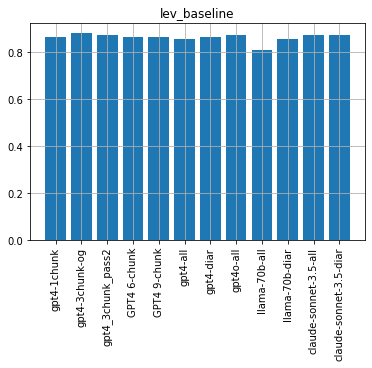

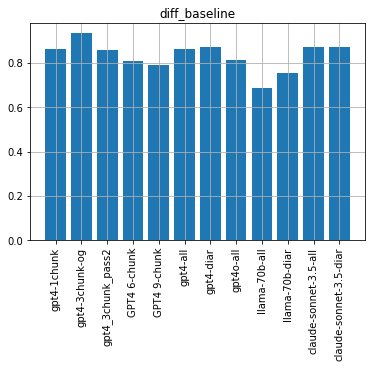

In [176]:
# Example plot_names representing the desired order of rows
plot_names = [
    'gpt4-1chunk',
    'gpt4-3chunk-og',
    'gpt4_3chunk_pass2',
    'GPT4 6-chunk',
    'GPT4 9-chunk',
    'gpt4-all',
    'gpt4-diar',
    'gpt4o-all',
    'llama-70b-all',
    'llama-70b-diar',
    'claude-sonnet-3.5-all',
    'claude-sonnet-3.5-diar'
]

# Assuming 'means' is your DataFrame and 'run_name' is the index column
#means.set_index('run_name', inplace=True)

# Reorder DataFrame based on plot_names
means_reordered = means.reindex(plot_names)

# Plot each column from col_names except the first and last
for col_name in col_names[1:-1]:
    plt.figure()  # Create a new figure for each plot
    plt.bar(plot_names, means_reordered[col_name])
    plt.xticks(rotation='vertical')
    plt.title(col_name)
    plt.grid(True)

# Display all figures
plt.show()

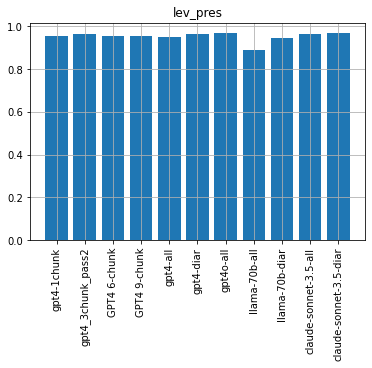

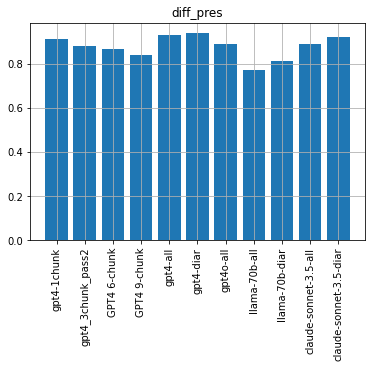

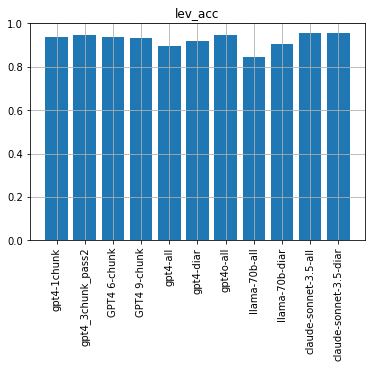

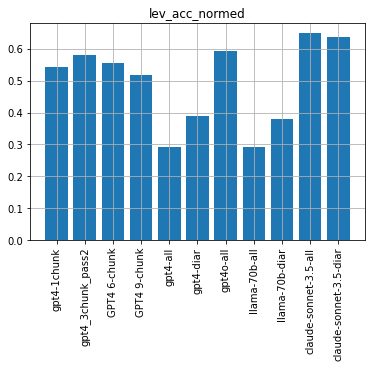

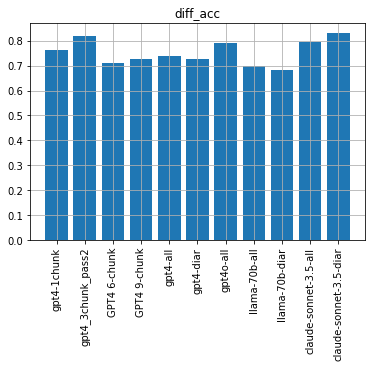

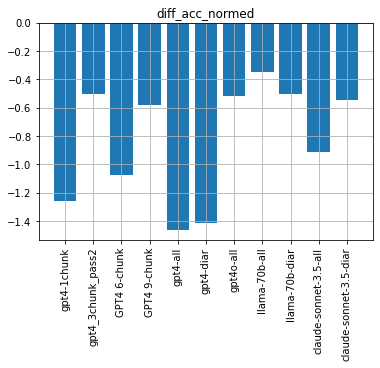

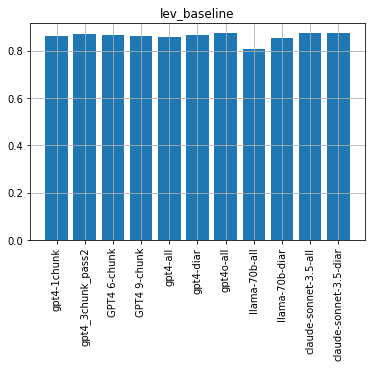

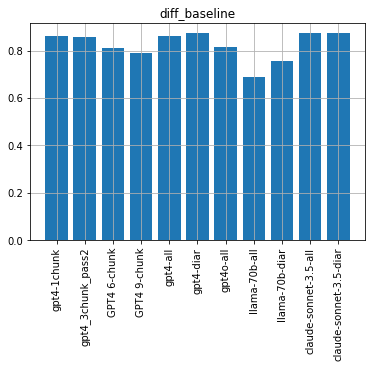

In [181]:
# Example plot_names representing the desired order of rows
plot_names = [
    'gpt4-1chunk',
    'gpt4_3chunk_pass2',
    'GPT4 6-chunk',
    'GPT4 9-chunk',
    'gpt4-all',
    'gpt4-diar',
    'gpt4o-all',
    'llama-70b-all',
    'llama-70b-diar',
    'claude-sonnet-3.5-all',
    'claude-sonnet-3.5-diar',
    'gpt4-3chunk-og',
]

# Assuming 'means' is your DataFrame and 'run_name' is the index column
#means.set_index('run_name', inplace=True)

# Reorder DataFrame based on plot_names
means_reordered = means.reindex(plot_names)

# Plot each column from col_names except the first and last
for col_name in col_names[1:-1]:
    plt.figure()  # Create a new figure for each plot
    plt.bar(plot_names[:-1], means_reordered[col_name][:-1])
    plt.xticks(rotation='vertical')
    plt.title(col_name)
    plt.grid(True)

# Display all figures
plt.show()

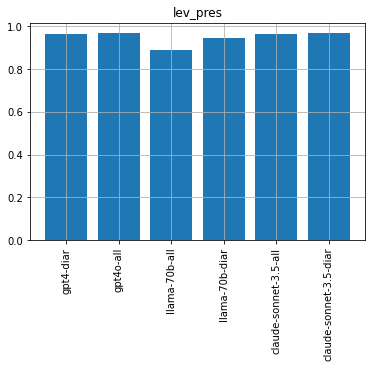

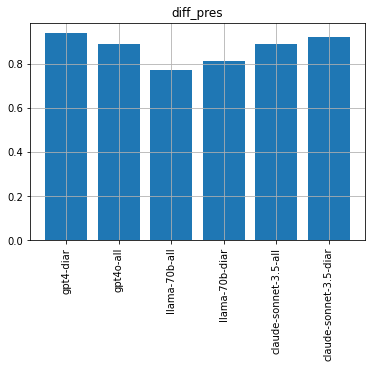

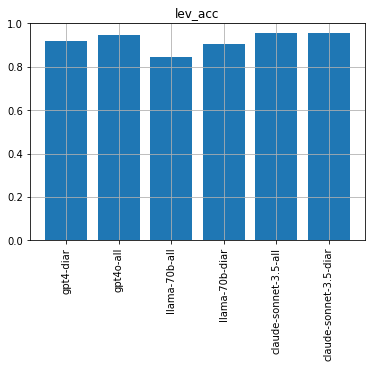

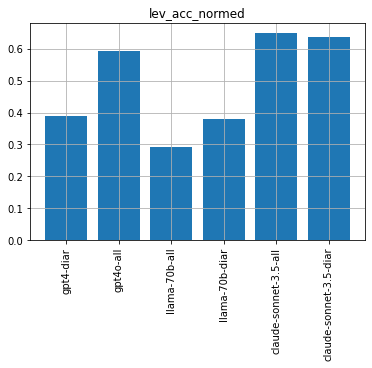

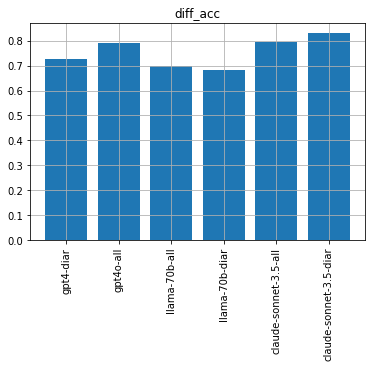

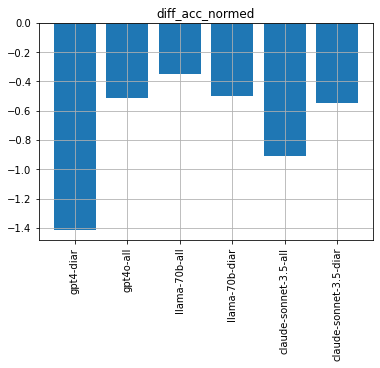

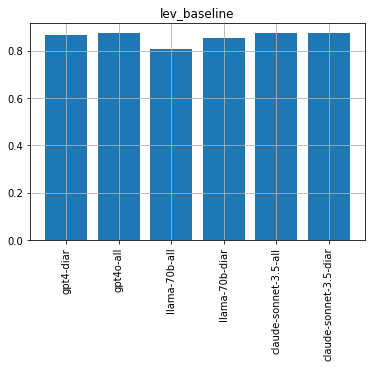

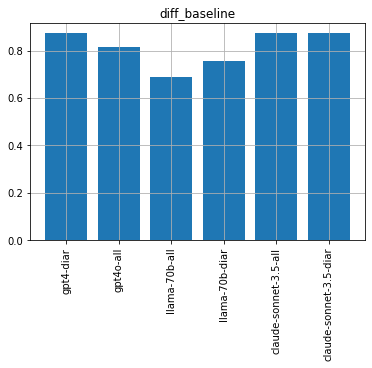

In [182]:
# Example plot_names representing the desired order of rows
plot_names = [
    'gpt4-diar',
    'gpt4o-all',
    'llama-70b-all',
    'llama-70b-diar',
    'claude-sonnet-3.5-all',
    'claude-sonnet-3.5-diar',
    'gpt4-3chunk-og',
]

# Assuming 'means' is your DataFrame and 'run_name' is the index column
#means.set_index('run_name', inplace=True)

# Plot each column from col_names except the first and last
for col_name in col_names[1:-1]:
    plt.figure()  # Create a new figure for each plot
    plt.bar(plot_names[:-1], means_reordered[col_name][5:-1])
    plt.xticks(rotation='vertical')
    plt.title(col_name)
    plt.grid(True)

# Display all figures
plt.show()